## 1.    Perkenalan

Nama    : I Made Dhanan Pradipta <br>
Batch   : 10

Objecktif : <br><br>
        Mampu memahami konsep Classification dengan Logistic Regression dan SVM <br>
        Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression dan SVM <br>
        Mampu mengimplementasikan Logistic Regression dan SVM untuk membuat prediksi


---
---
## 2.   Import Library

In [1]:
#library for data processing
import pandas as pd
import numpy as np

#library fo visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV


In [2]:
import warnings

warnings.filterwarnings('ignore')

---
---
## 3.   Data Loading

In [3]:
#load data with csv extension
df = pd.read_csv('dataset/weatherAUS.csv') 

In [4]:
#inspect 5 beginning  row
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
#inspect info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
#check name of columns
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
#make a copy of default dataset for later uses
rain_df = df.copy()

In [8]:
#check missing value dataset
rain_df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

#### Note    :
1. dataset terdiri dari 23 columns dan 145460 row
2. type data pada dataset mix antara _float64_ dan _object_
3. kolom numerikal mempunyai type _object_
4. kolom categorikal mempunyai type _float64_
5. terdapat missing value pada dataset


---
---
## 4.   Exploratory Data Analysis (EDA)

#### Step by Step
1. Target analysis
2. Variabel analysis
    - Numerikal
    - Categorikal
3. Cek missing value
4. Cek Outlier

---
#### 1.  Target Analysis (_RainTomorrow_)

In [9]:
#check value of target
rain_df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [10]:
#check missing value of target
rain_df['RainTomorrow'].isnull().sum()

3267

In [11]:
#drop missing value of target
rain_df.dropna(subset=['RainTomorrow'], inplace=True)

In [12]:
#check shape of target
rain_df['RainTomorrow'].shape


(142193,)

In [13]:
#check unique value of target
rain_df['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
rain_count = rain_df.groupby('RainTomorrow').size().reset_index(name="counts")

  RainTomorrow  counts
0           No  110316
1          Yes   31877


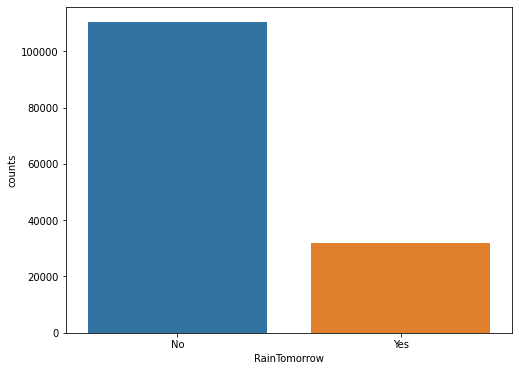

In [15]:
#make visualization of target
print(rain_count)
plt.figure(figsize=(8, 6))
ax = sns.barplot(x="RainTomorrow", y="counts", data=rain_count)

#### Note   :
1. Nama kolom target yaitu _RainTomorrow_, dimana hasil dari prediksi kondisi hujan besok berdasarkan feature2nya
2. Value pada kolom target adalah _Yes_, _No_ dan _Nan_
3. Terdapat missing value _Nan_, dimana value tsb harus segera didrop
4. Terdapat 3267 buah missing value pada kolom target
5. row akhir berjumlah 142193 setelah missing value dihapus
6. Terdapat 110316 dengan value _No_ yang berarti tidak hujan pada besok hari
7. Terdapat 31877 dengan value _Yes_ yang berarti hujan pada besok hari

---
#### 2.  Variable Analysis

a.  Numerical Columns

In [16]:
#split columns in 2 type, numerical and categorical
num_columns = rain_df.select_dtypes(include=np.number).columns.tolist()
cat_columns = rain_df.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns are : ' , num_columns)
print()
print('Categorical Columns are : ' , cat_columns)

Numerical Columns are :  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

Categorical Columns are :  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [17]:
#check missing value from num columns
rain_df[num_columns].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
dtype: int64

In [18]:
#check describe of num columns
rain_df[num_columns].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


Text(0, 0.5, 'WindGustSpeed')

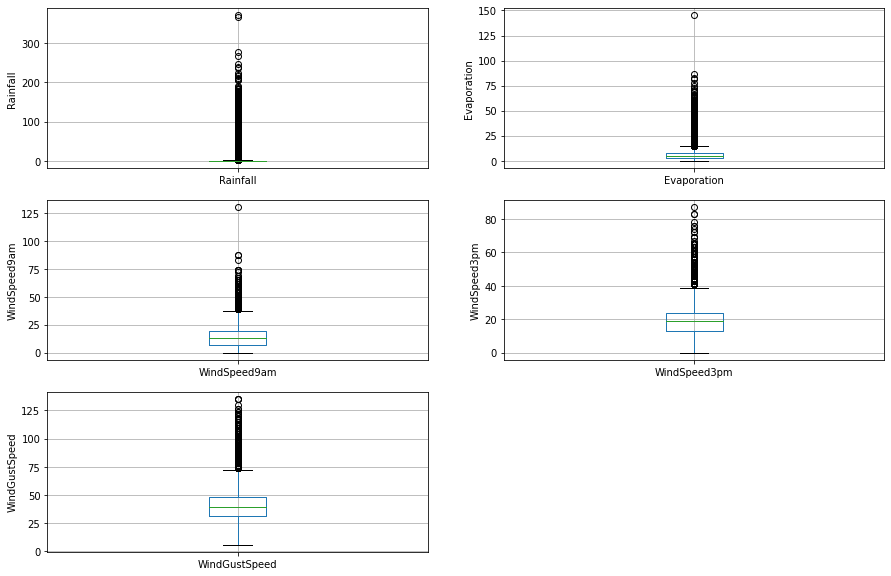

In [101]:
#make visualization of num columns on boxplot
plt.figure(figsize=(15,10))

plt.subplot(3, 2, 1)
fig = rain_df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(3, 2, 2)
fig = rain_df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(3, 2, 3)
fig = rain_df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(3, 2, 4)
fig = rain_df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

plt.subplot(3, 2, 5)
fig = rain_df.boxplot(column='WindGustSpeed')
fig.set_title('')
fig.set_ylabel('WindGustSpeed')



Text(0, 0.5, 'RainTomorrow')

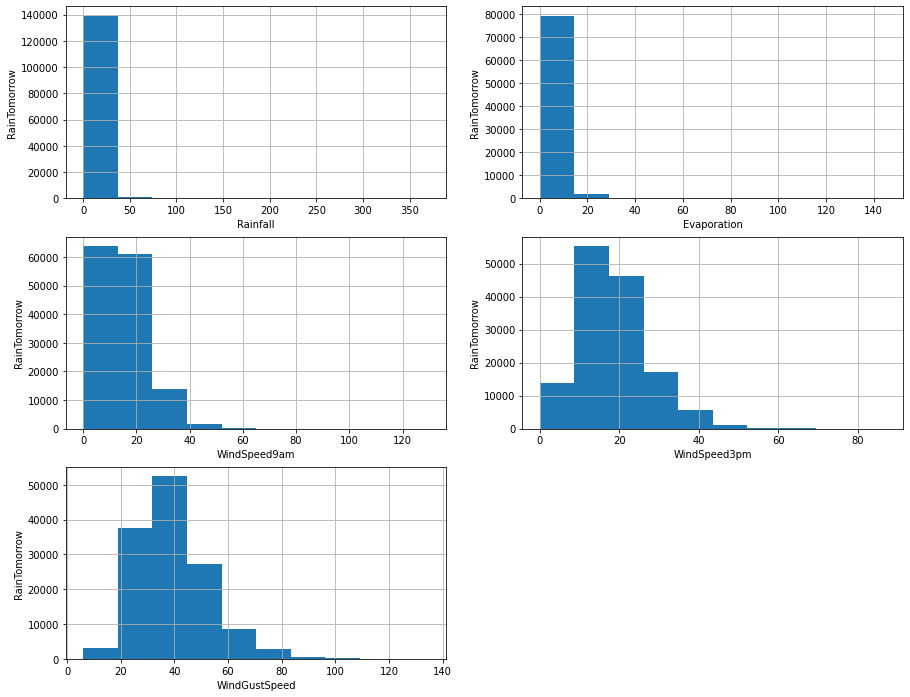

In [19]:
#make visualization of num columns in hist plot
plt.figure(figsize=(15,12))


plt.subplot(3, 2, 1)
fig = rain_df['Rainfall'].hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(3, 2, 2)
fig = rain_df['Evaporation'].hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(3, 2, 3)
fig = rain_df['WindSpeed9am'].hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(3, 2, 4)
fig = rain_df['WindSpeed3pm'].hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

plt.subplot(3, 2, 5)
fig = rain_df['WindGustSpeed'].hist(bins=10)
fig.set_xlabel('WindGustSpeed')
fig.set_ylabel('RainTomorrow')

In [20]:
#make dataset which going to do in correlation
num_corr = rain_df[num_columns]

<AxesSubplot:>

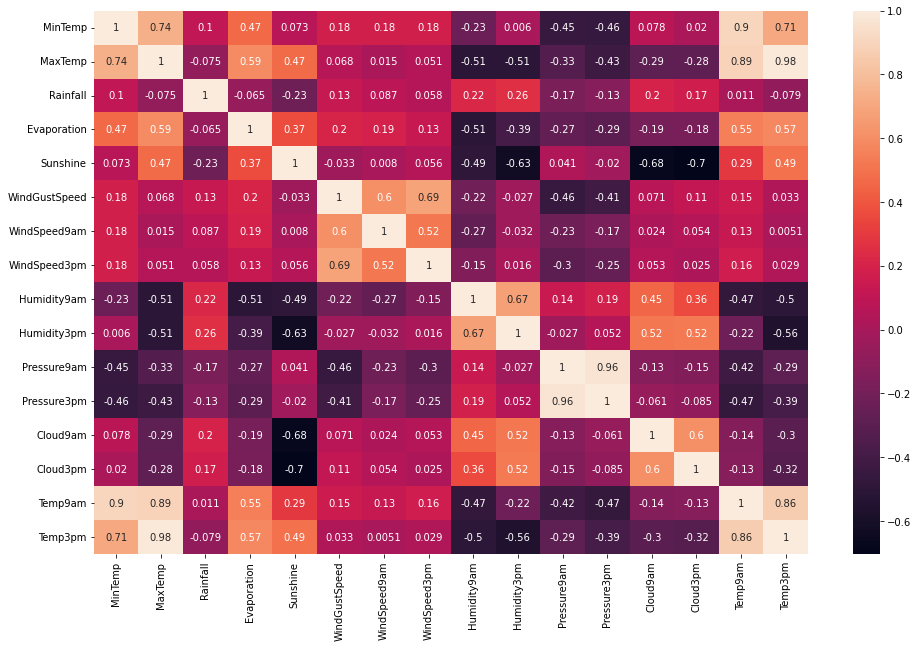

In [21]:
#make visualization of heatmap
plt.figure(figsize=(16,10))
sns.heatmap(num_corr.corr(),annot=True)

#### Note   :
1.  Terdapat 16 kolom dengan type numerikal dan terdapat 6 kolom dengan type categorikal
2.  terdapat missing value pada kolom numerikal
3.  berdasarkan deskripsi dari kolom numerikal, terdapat keanehan dari kolom _rainfall_, _evaporation_, _windgustspeed_, _windspeed9am_, _windspeed3pm_, dimana antara max dan min value dengan mean value tidak sinkron, sehingga diduga terdapat outlier
4.  Dari visualisari menggunakan boxplot, _rainfall_, _evaporation_, _windgustspeed_, _windspeed9am_, _windspeed3pm_ benar mengandung outlier
5.  Dari visualisasi menggunakan histplot, _rainfall_, _evaporation_, _windgustspeed_, _windspeed9am_, _windspeed3pm_ berbentuk right-skewness
6.  Pada visualisasi correlation menggunakan heatmap terdapat high correlation antar variable seperti :
    - _MinTemp_ dan MaxTemp variables memiliki positif corr (correlation coefficient = 0.74).
    - _MinTemp_ dan _Temp3pm_ variables memiliki positif corr (correlation coefficient = 0.71).
    - _MinTemp_ dan _Temp9am_ variables memiliki positif corr (correlation coefficient = 0.90).
    - _MaxTemp_ dan _Temp9am_ variables amemiliki positif corr (correlation coefficient = 0.89).
    - _MaxTemp_ dan _Temp3pm_ variables memiliki positif corr (correlation coefficient = 0.98).
    - _Pressure9am_ dan _Pressure3pm_ memiliki positif corr (correlation coefficient = 0.96).
    - _Temp9am_ dan _Temp3pm_ variables memiliki positif corr (correlation coefficient = 0.86).



b.  Categorical Columns

In [22]:
#check categorical value
print('Categorical Columns are : ' , cat_columns)

Categorical Columns are :  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [23]:
#check info of cat columns
rain_df[cat_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Date          142193 non-null  object
 1   Location      142193 non-null  object
 2   WindGustDir   132863 non-null  object
 3   WindDir9am    132180 non-null  object
 4   WindDir3pm    138415 non-null  object
 5   RainToday     140787 non-null  object
 6   RainTomorrow  142193 non-null  object
dtypes: object(7)
memory usage: 8.7+ MB


In [24]:
#change type of date to datetime
rain_df['Date'] = pd.to_datetime(rain_df['Date'])

In [25]:
#check how many of variable each cat columns
for val in rain_df[cat_columns]:
    print(f'{val} contains : {len(rain_df[val].unique())} variable')
    print()

Date contains : 3436 variable

Location contains : 49 variable

WindGustDir contains : 17 variable

WindDir9am contains : 17 variable

WindDir3pm contains : 17 variable

RainToday contains : 3 variable

RainTomorrow contains : 2 variable



In [26]:
#make another format of date, because of cardinality
rain_df['Year'] = rain_df['Date'].dt.year
rain_df['Month'] = rain_df['Date'].dt.month
rain_df['Day'] = rain_df['Date'].dt.day


In [27]:
#drop column date
rain_df.drop(columns=['Date'], axis=0, inplace=True)

In [28]:
#check column after drop the date
cat_columns = rain_df.select_dtypes(include=['object']).columns.tolist()
rain_df[cat_columns].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No


In [29]:
#function to visualization of cat columns
def show_counts(col):
    col_df = rain_df.groupby(col).size().reset_index(name="counts")
    plt.figure(figsize=(10, 6))
    axs = sns.barplot(x=col, y="counts", data=col_df)
    axs.tick_params(axis='x', rotation=90)

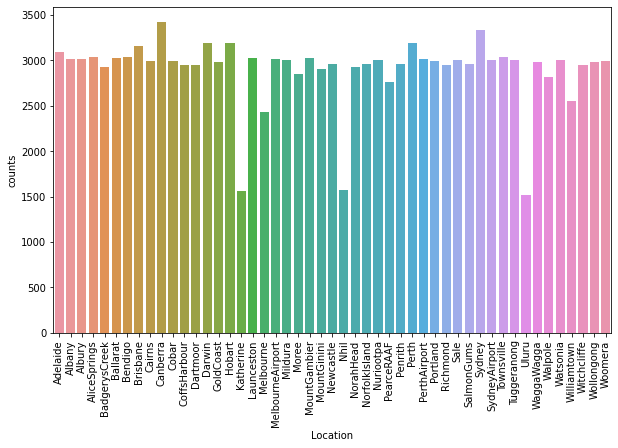

In [30]:
show_counts('Location')


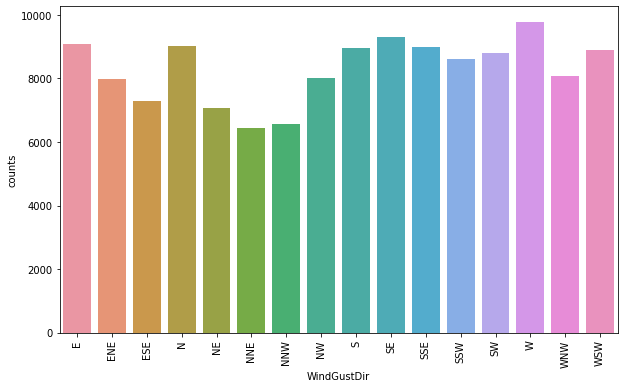

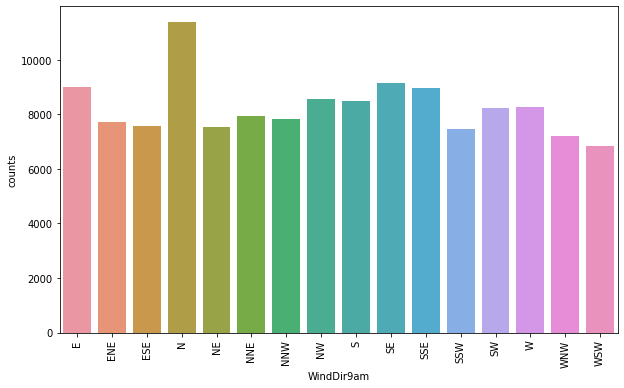

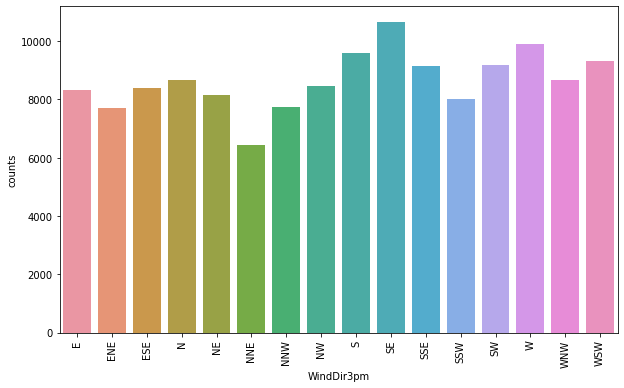

In [31]:
show_counts('WindGustDir')
show_counts('WindDir9am')
show_counts('WindDir3pm')


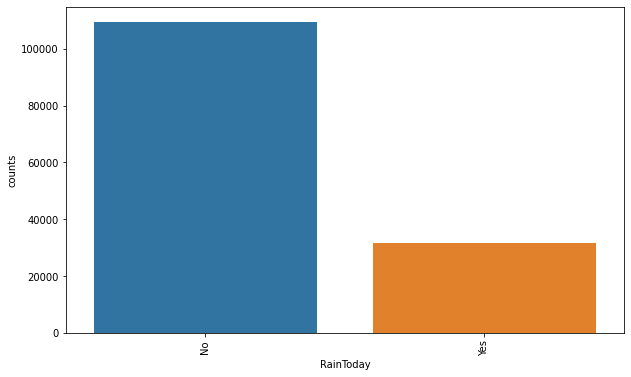

In [32]:
show_counts('RainToday')

In [33]:
#check missing value of cat_columns
rain_df[cat_columns].isnull().sum()

Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

#### Note   :
1.  Setelah dicek berapa banyak variabel yang terdapat pada categorical column, terdapat High cardinality pada kolom _Date_
    *High cardinality adalah kasus dimana jumlah unique value pada sebuah kolom terlampau banyak, sehingga sangat riskan utk dimasukan ke model
2.  Untuk menghilangkan cardinality, kolom _Date_ dipecah menjadi _Year_, _Month_ dan _Day_, kemudian didrop 
3.  Lokasi data yang digunakan, sangat merata diseluruh wilayah Australia sebesar kurang lebih 3000 buah
4.  _WindGust_, _WindDir9am_, _WIndDir3pm_ sama2 memiliki 17 variabel 
5.  Kolom _Raintoday_ menunjukan value _No_ (tidak hujan pada hari ini) lebih banyak dibandingkan value _Yes_ (hujan pada hari ini)

---
---
## 5.   Preprocessing

#### Step by Step   :
1.  Split Train dan test set
2.  Handling missing value
3.  Handling outlier
4.  Scalling
5.  Encoding

---
#### 1.  Split Train and Test set

In [34]:
X = rain_df.drop(columns=['RainTomorrow'], axis=1)
y = rain_df['RainTomorrow']

In [35]:
#split data X, y with parameter 20% test and 80% training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

In [36]:
#split training set into numeric and categoric columns
numeric_columns = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns :', numeric_columns)
print()
print('Categorical Columns :', categorical_columns)

Numerical Columns : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']

Categorical Columns : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


---
#### 2. Handling Missing value (Numerical Value)

In [37]:
#check missing value and percentage of missing value
num_missing = X_train[numeric_columns].isnull().sum()
percentage_num_missing = X_train[numeric_columns].isnull().sum() * 100 / len(X_train)

print('Numerical value missing : ', num_missing)


Numerical value missing :  MinTemp            512
MaxTemp            261
Rainfall          1104
Evaporation      48681
Sunshine         54233
WindGustSpeed     7422
WindSpeed9am      1067
WindSpeed3pm      2073
Humidity9am       1405
Humidity3pm       2834
Pressure9am      11209
Pressure3pm      11185
Cloud9am         42824
Cloud3pm         45531
Temp9am            720
Temp3pm           2137
Year                 0
Month                0
Day                  0
dtype: int64


In [38]:
print('Numerical value missing percentage : ', percentage_num_missing)

Numerical value missing percentage :  MinTemp           0.450094
MaxTemp           0.229442
Rainfall          0.970515
Evaporation      42.794979
Sunshine         47.675686
WindGustSpeed     6.524606
WindSpeed9am      0.937989
WindSpeed3pm      1.822353
Humidity9am       1.235121
Humidity3pm       2.491341
Pressure9am       9.853719
Pressure3pm       9.832621
Cloud9am         37.646149
Cloud3pm         40.025845
Temp9am           0.632945
Temp3pm           1.878615
Year              0.000000
Month             0.000000
Day               0.000000
dtype: float64


In [39]:
#FIll Nan value in numerical columns with media value
for df in [X_train, X_test]:
    for col in numeric_columns:
        col_median=X_train[col].median()
        df[col].fillna(col_median, inplace=True)   

In [40]:
#check missing value to make sure of the numeric value
X_train[numeric_columns].isnull().sum() * 100 / len(X_train)

MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustSpeed    0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
Year             0.0
Month            0.0
Day              0.0
dtype: float64

In [41]:
X_test[numeric_columns].isnull().sum() * 100 / len(X_train)

MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustSpeed    0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
Year             0.0
Month            0.0
Day              0.0
dtype: float64

In [42]:
#check size of training and test set after fill the missing value using median
print(X_train.shape, X_test.shape)

(113754, 24) (28439, 24)


#### Note   :
1.  Untuk missing value pendapat pribadi saya bahwa, mv bersifat acak atau Missing completely at random (MCAR), sehingga dapat disimpulkan bahwa untuk mengisi mv bisa menggunakan imputasi rata2, median atau sampel acak
2.  Median digunakan karena, metode ini cocok pada data yang memiliki outlier yang besar, dan dari pengecekan outlier dibagian sebelumnya bahwa numerical value mempunyai outlier yang cukup besar

In [43]:
#check missing value of cat columns and the percentage of missing value
cat_missing = X_train[categorical_columns].isnull().sum()
persen_cat_missing = X_train[categorical_columns].isnull().sum() * 100 / len(X_train)

print('Categorical value missing : ', cat_missing)
print()
print('Categorical value missing percentage : ', persen_cat_missing)

Categorical value missing :  Location          0
WindGustDir    7468
WindDir9am     7968
WindDir3pm     3010
RainToday      1104
dtype: int64

Categorical value missing percentage :  Location       0.000000
WindGustDir    6.565044
WindDir9am     7.004589
WindDir3pm     2.646061
RainToday      0.970515
dtype: float64


In [44]:
#fill missing value cat columns using mode method
for df in [X_train, X_test]:
    for col in categorical_columns:
        col_mode=X_train[col].mode()
        df[col].fillna(col_mode[0], inplace=True)   

In [45]:
#check missing value to make sure the cat columns
X_train[categorical_columns].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [46]:
X_test[categorical_columns].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

#### Nota   :
1.  Missing value pada kolom categorical disi menggunakan metode mode, atau value yang paling banyak muncul
2.  Penghapusan missing value pada kolom dihindari karena, diyakini akan menghapus informasi yang penting pada model

---
#### 3.  Handling Oultier

In [48]:
#make function to check outlier
def calc_outlier(new_df, col):

    q1 = np.quantile(new_df[col], 0.25)
    q3 = np.quantile(new_df[col], 0.75)
    iqr = q3 - q1

    #cari batas atas dan batas bawah
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr
    
    new_df[col] = np.where(
    new_df[col] > upper,
    upper,
    np.where(
        new_df[col] < lower,
        lower,
        new_df[col]
        )
    )

In [49]:
#in section above, there is some columns that has outlier, check using function before
calc_outlier(X_train, 'Rainfall')
calc_outlier(X_train, 'Evaporation')
calc_outlier(X_train, 'WindSpeed9am')
calc_outlier(X_train, 'WindSpeed3pm')
calc_outlier(X_train, 'WindGustSpeed')


In [50]:
#check the description of trainset which had outlier handled
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,12.185905,23.235539,0.385304,4.798824,8.043126,39.586116,13.900171,18.549365,68.832015,51.445954,1017.653105,1015.254185,4.651924,4.706278,16.990472,21.689750,2012.758866,6.397489,15.694982
std,6.399351,7.117889,0.610070,1.629511,2.772574,12.195800,8.551367,8.436310,18.944425,20.527913,6.739460,6.679643,2.296277,2.121141,6.483912,6.881915,2.541199,3.426960,8.799480
min,-8.500000,-4.800000,0.000000,1.900000,0.000000,8.500000,0.000000,0.000000,1.000000,0.000000,982.000000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,2011.000000,3.000000,8.000000
50%,12.000000,22.700000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,1.500000,7.500000,14.500000,68.500000,37.000000,40.500000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,39.400000,46.700000,2017.000000,12.000000,31.000000


#### Note   :
1. outlier yang sebelumnya dicek pada bagian EDA, kemudian dihandling menggunakan metode IQR
2. Metode IQR digunakan karena distribusi dari kolom yang bersifat right-skewness

---
#### 4.  Feature Encoding

In [51]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(X_train[categorical_columns])
X_train_cat_enc = encoder.transform(X_train[categorical_columns])
X_test_cat_enc = encoder.transform(X_test[categorical_columns])
cat_col_name = encoder.get_feature_names(['Loc', 'WindDir', 'Wind9am', 'Wind3pm', 'RainToday'])

#### Note   :
1. Encoding digunakan untuk mengubah value dari kolom kategorikal, sehingga bisa diproses kedalam model
2. OHE digunakan, karena semua value dari kolom kategorikal yang ada pada dataset bersifat individual, atau tidak memiliki hubungan dengan value lainya

---
#### 5. Feature Scalling

In [52]:
scaler = MinMaxScaler()
scaler.fit(X_train[numeric_columns]) 

X_train_num_scaled = scaler.transform(X_train[numeric_columns])
X_test_num_scaled = scaler.transform(X_test[numeric_columns])

In [135]:
X_train_num_scaled

array([[0.62264151, 0.72400756, 0.        , ..., 0.3       , 0.18181818,
        0.96666667],
       [0.49764151, 0.39508507, 0.13333333, ..., 0.3       , 1.        ,
        0.83333333],
       [0.44339623, 0.55009452, 0.        , ..., 0.5       , 0.36363636,
        0.93333333],
       ...,
       [0.59669811, 0.56143667, 0.13333333, ..., 0.9       , 1.        ,
        0.6       ],
       [0.7759434 , 0.68809074, 1.        , ..., 0.3       , 0.09090909,
        0.2       ],
       [0.56132075, 0.51984877, 0.26666667, ..., 0.3       , 0.27272727,
        0.3       ]])

#### Note   :
1. Scalling bertujuan untuk menyamaratakan satuan pada semua feature column, sehingga bisa diproses kedalam model
2. MinMaxScaler digunakan karena, metode ini tidak mengubah bentuk asli dari distribusi, sehingga tidak mengubah informasi asli dari data.

---
---
## 6. Model Definition and Training

#### Step by step   :
1.  Buat traning dan test set final
2.  Definisikan model menggunakan LogisticReggresion
3.  Definisikan model menggunakan SVC
4.  Training kedua model

In [53]:
#combine dataset that contain Train numeric and train encode to make training final, so is Test set
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_enc], axis=1)
X_test_final =  np.concatenate([X_test_num_scaled, X_test_cat_enc], axis=1)

In [54]:
#show the datafreme of final dataset
df_cat = pd.DataFrame(X_train_cat_enc, columns=cat_col_name)
df_num = pd.DataFrame(X_train_num_scaled, columns=numeric_columns)
df_num.join(df_cat).head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Wind3pm_S,Wind3pm_SE,Wind3pm_SSE,Wind3pm_SSW,Wind3pm_SW,Wind3pm_W,Wind3pm_WNW,Wind3pm_WSW,RainToday_No,RainToday_Yes
0,0.622642,0.724008,0.000000,0.517857,0.703448,0.508333,0.459459,0.691358,0.292929,0.14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.497642,0.395085,0.133333,0.625000,0.165517,0.508333,0.540541,0.493827,0.868687,0.53,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.443396,0.550095,0.000000,0.196429,0.648276,0.508333,0.702703,0.320988,0.464646,0.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.384434,0.461248,0.000000,0.660714,0.751724,0.575000,0.540541,0.320988,0.656566,0.32,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.426887,0.457467,0.000000,0.517857,0.586207,0.358333,0.243243,0.469136,0.787879,0.61,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [55]:
X_train_final

array([[0.62264151, 0.72400756, 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.49764151, 0.39508507, 0.13333333, ..., 0.        , 1.        ,
        0.        ],
       [0.44339623, 0.55009452, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.59669811, 0.56143667, 0.13333333, ..., 0.        , 1.        ,
        0.        ],
       [0.7759434 , 0.68809074, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.56132075, 0.51984877, 0.26666667, ..., 1.        , 1.        ,
        0.        ]])

In [56]:
# instantiate the model
logreg = LogisticRegression()


# fit the model
logreg.fit(X_train_final, y_train)

LogisticRegression()

---
---
## 7.  Model Evaluation

In [57]:
#predict logreg model test set
y_pred_test = logreg.predict(X_test_final)

y_pred_test

array(['No', 'No', 'Yes', ..., 'No', 'No', 'Yes'], dtype=object)

In [58]:
#check probability the predict of logreg of Rain is happen tomorrow
logreg.predict_proba(X_test_final)[:,0] # 0 - Rain

array([0.7350249 , 0.94668261, 0.01126851, ..., 0.99423097, 0.97691927,
       0.20551762])

In [59]:
#check probability the predict of logreg of Rain is not happen tomorrow
logreg.predict_proba(X_test_final)[:,1] # 1 - No Rain

array([0.2649751 , 0.05331739, 0.98873149, ..., 0.00576903, 0.02308073,
       0.79448238])

In [60]:
#predict logreg model of training set
y_pred_train = logreg.predict(X_train_final)

y_pred_train

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [61]:
#print accuracy of logisticregression model
print('accuracy score training - set: {}'. format(accuracy_score(y_train, y_pred_train)))

print('accuracy score test - set : {} '. format(accuracy_score(y_test, y_pred_test)))



accuracy score training - set: 0.8485415897462947
accuracy score test - set : 0.8228489046731601 


In [62]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.88      0.89      0.89     22049
         Yes       0.61      0.60      0.60      6390

    accuracy                           0.82     28439
   macro avg       0.75      0.74      0.75     28439
weighted avg       0.82      0.82      0.82     28439



In [146]:
svc = SVC()
svc.fit(X_train_final,y_train)

In [147]:
y_pred_train_svc = svc.predict(X_train_final)
y_pred_test_svc = svc.predict(X_test_final)

In [148]:
print('accuracy score training - set using SVC: {}'. format(accuracy_score(y_train, y_pred_train_svc)))

print('accuracy score test - set usning SVC : {} '. format(accuracy_score(y_test, y_pred_test_svc)))

In [149]:
print(classification_report(y_test, y_pred_test_svc))

#### Note   :
- LogisticReggresion
1.  Training set akurasi yaitu 0.84, sedangkan pada test set yaitu 0.822
2.  Precision mengidentifikasi proporsi hasil positif yang diprediksi dengan benar, dengan skore 88% pada jawaban _No_ dan 60% pada jawaban _Yes_
3.  Recall mengidentifikasi proporsi positif aktual yang diprediksi dengan benar, dengan skore 89% pada jawaban _No_ dan 60% pada jawaban _Yes_ 
4.  f1-score adalah rata-rata dari Precision dan Recall
5.  Support adalah jumlah aktual kemunculan kelas dalam dataset, yatu 22049 pada jawaban _No_ dan 6390 pada jawaban _Yes_

-  SVM
1.  Training set akurasi yaitu 0.86, sedangkan pada test set yaitu 0.82
2.  Precision mengidentifikasi proporsi hasil positif yang diprediksi dengan benar, dengan skore 88% pada jawaban _No_ dan 60% pada jawaban _Yes_
3.  Recall mengidentifikasi proporsi positif aktual yang diprediksi dengan benar, dengan skore 89% pada jawaban _No_ dan 60% pada jawaban _Yes_
4.  Support adalah jumlah aktual kemunculan kelas dalam dataset, yatu 22049 pada jawaban _No_ dan 6390 pada jawaban _Yes_

---
#### 1. Tuning Model Using GridSearchCV

In [ ]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_final, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [75]:
# instantiate the model
logreg100 = LogisticRegression(C=100, solver='newton-cg', penalty='l2')


# fit the model
logreg100.fit(X_train_final, y_train)

LogisticRegression(C=100, solver='newton-cg')

In [76]:
y_pred_test = logreg100.predict(X_test_final)
y_pred_train = logreg100.predict(X_train_final)

In [77]:
print('accuracy score training - set: {}'. format(accuracy_score(y_train, y_pred_train)))

print('accuracy score test - set : {} '. format(accuracy_score(y_test, y_pred_test)))

accuracy score training - set: 0.8488228985354361
accuracy score test - set : 0.8228137416927459 


In [229]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_final, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
svc_poly = SVC(C=1, gamma='scale', kernel='poly')
svc_poly.fit(X_train_final,y_train)

In [ ]:
y_pred_train_svc = svc_poly.predict(X_train_final)
y_pred_test_svc = svc_poly.predict(X_test_final)

In [ ]:
print('accuracy score training - set using SVC: {}'. format(accuracy_score(y_train, y_pred_train_svc)))

print('accuracy score test - set usning SVC : {} '. format(accuracy_score(y_test, y_pred_test_svc)))

### Note    :
1.  Tuning menggunakan GridSearchCV untuk mencari hyperparameter yang paling baik terhadap model yang digunakan
2.  Pada kasus kali ini, LogisticRegression mendapatkan nilai akurasi lebih baik jika C=100 dan solver = newton-cg
3.  untuk SVM, dari pribadi belum sempat mencoba parameter yang didapat pada GridSearchCV karna proses running yang sangat lama
4.  Kesimpulanya, adalah bahwa untuk mendapatkan akurasi yang lebih baik pada model dapat dilakukan proses tuning hyperparameter

---
---
## 8.   Model Inference

In [205]:
#search sample to use as data inference
data_inf = rain_df.sample(10, random_state=18)

In [206]:
data_inf

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
132026,Hobart,10.8,16.5,2.4,2.6,5.8,NNW,41.0,E,SE,...,1012.0,4.0,7.0,12.8,16.3,Yes,No,2014,9,25
50517,Tuggeranong,8.2,18.5,0.2,NaN,NaN,SSE,35.0,S,ESE,...,1021.9,NaN,NaN,12.4,17.3,No,No,2013,4,3
137958,AliceSprings,12.4,16.9,12.0,7.0,3.5,SSE,33.0,SE,SE,...,1017.9,4.0,8.0,15.0,15.9,Yes,No,2014,4,30
96955,Adelaide,21.0,22.6,0.2,NaN,0.0,SW,28.0,NaN,NNE,...,1011.2,NaN,NaN,22.3,19.0,No,Yes,2010,3,28
10867,CoffsHarbour,17.8,26.2,0.4,4.4,NaN,E,26.0,WNW,E,...,1015.9,8.0,NaN,20.5,26.0,No,No,2014,3,14
94900,Townsville,11.5,26.1,0.0,7.0,10.5,NNE,30.0,N,NE,...,1016.4,1.0,1.0,20.9,24.7,No,No,2013,8,6
23166,NorfolkIsland,15.3,21.2,0.0,6.6,7.3,E,50.0,E,ENE,...,1018.6,6.0,7.0,20.0,18.7,No,No,2014,11,7
67265,Melbourne,5.4,18.5,0.0,3.0,6.5,SSE,30.0,N,ESE,...,1029.2,7.0,3.0,7.5,17.8,No,No,2008,9,4
85233,Brisbane,16.9,27.5,2.4,3.8,10.8,E,24.0,SSE,E,...,1010.5,4.0,7.0,24.9,25.4,Yes,Yes,2011,12,9
95210,Townsville,16.6,26.9,0.0,4.6,10.4,ESE,39.0,SE,E,...,1012.6,2.0,2.0,23.0,26.0,No,No,2014,6,12


In [207]:
data_inf_test = data_inf.copy() 

In [208]:
#drop target to use as model inference
data_inf_test.drop(columns=['RainTomorrow'], axis=1, inplace=True)

In [209]:
#split data inf to cat columns and num columns
num_columns_inf = data_inf_test.select_dtypes(include=np.number).columns.tolist()
cat_columns_inf = data_inf_test.select_dtypes(include=['object']).columns.tolist()

print('Data Inference num columns : ', num_columns_inf)
print('Data inference cat columns : ', cat_columns_inf)

Data Inference num columns :  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']
Data inference cat columns :  ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [210]:
#check missing value num column
data_inf_test[num_columns_inf].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      2
Sunshine         2
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         2
Cloud3pm         3
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [211]:
#check missing value cat column
data_inf_test[cat_columns_inf].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     1
WindDir3pm     0
RainToday      0
dtype: int64

In [212]:
#fill missing value in num column using median
for col in num_columns_inf:
    col_median=data_inf_test[col].median()
    data_inf_test[col].fillna(col_median, inplace=True)  


In [213]:
#fill missing value in cat column using mode
for col in cat_columns_inf:
    col_mode=data_inf_test[col].mode()
    data_inf_test[col].fillna(col_mode[0], inplace=True)   

In [214]:
data_inf_test[cat_columns_inf].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [215]:
data_inf_test[num_columns_inf].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [216]:
data_inf_num = data_inf_test[num_columns_inf]
data_inf_cat = data_inf_test[cat_columns_inf]

In [217]:
data_inf_num.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000,10.00000,10.000000,10.000000,10.00000,10.0000,10.00000
mean,13.590000,22.090000,1.760000,4.800000,6.860000,33.600000,11.000000,15.500000,70.300000,59.100000,1018.850000,1016.620000,4.4000,5.60000,17.930000,20.710000,2012.50000,6.9000,13.80000
std,4.775737,4.351105,3.723559,1.576917,3.351683,7.904991,8.819171,6.867799,9.055999,15.125034,6.620717,5.740654,2.1187,2.54733,5.650575,4.262615,2.12132,3.3483,10.19586
min,5.400000,16.500000,0.000000,2.600000,0.000000,24.000000,0.000000,6.000000,58.000000,43.000000,1011.500000,1010.500000,1.0000,1.00000,7.500000,15.900000,2008.00000,3.0000,3.00000
25%,10.975000,18.500000,0.000000,3.950000,5.975000,28.500000,5.250000,11.000000,65.750000,45.750000,1013.875000,1012.150000,4.0000,4.00000,13.350000,17.425000,2011.50000,4.0000,6.25000
50%,13.850000,21.900000,0.200000,4.500000,6.900000,31.500000,9.000000,15.000000,70.000000,59.000000,1019.450000,1016.150000,4.0000,7.00000,20.250000,18.850000,2013.50000,7.0000,10.50000
75%,16.825000,26.175000,1.900000,6.100000,9.625000,38.000000,16.000000,18.500000,73.500000,65.750000,1020.575000,1018.425000,5.5000,7.00000,21.950000,25.225000,2014.00000,9.0000,22.25000
max,21.000000,27.500000,12.000000,7.000000,10.800000,50.000000,30.000000,28.000000,89.000000,90.000000,1034.400000,1029.200000,8.0000,8.00000,24.900000,26.000000,2014.00000,12.0000,30.00000


Text(0, 0.5, 'Cloud9am')

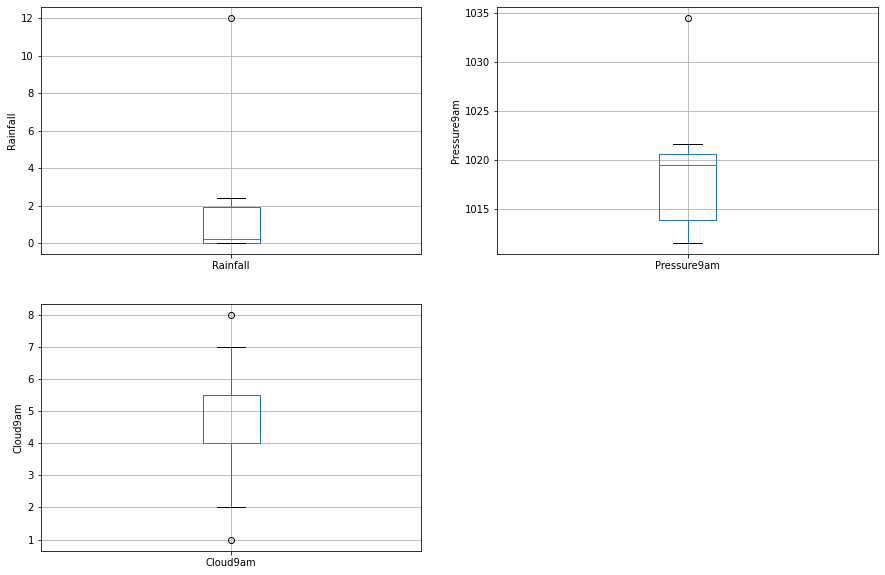

In [218]:
#visualization data to show the outlier 
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = data_inf_num.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = data_inf_num.boxplot(column='Pressure9am')
fig.set_title('')
fig.set_ylabel('Pressure9am')


plt.subplot(2, 2, 3)
fig = data_inf_num.boxplot(column='Cloud9am')
fig.set_title('')
fig.set_ylabel('Cloud9am')


In [219]:
#handling the outlier 
def calc_outlier(new_df, col):

    q1 = np.quantile(new_df[col], 0.25)
    q3 = np.quantile(new_df[col], 0.75)
    iqr = q3 - q1

    #cari batas atas dan batas bawah
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr
    
    new_df[col] = np.where(
    new_df[col] > upper,
    upper,
    np.where(
        new_df[col] < lower,
        lower,
        new_df[col]
        )
    )

calc_outlier(data_inf_num, 'Rainfall')
calc_outlier(data_inf_num, 'Pressure9am')
calc_outlier(data_inf_num, 'Cloud9am')

In [220]:
#scaled num data and encode cat data, not using fit
data_inf_num_scaled = scaler.transform(data_inf_num)
data_inf_cat_enc = encoder.transform(data_inf_cat)

In [221]:
#concate data tobe a data final
data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_enc], axis=1)
pd.DataFrame(data_inf_final)

,0,1,2,3,4,5,6,7,8,9,...,108,109,110,111,112,113,114,115,116,117
0,0.455189,0.402647,1.600000,0.125000,0.400000,0.541667,0.351351,0.271605,0.737374,0.45,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.393868,0.440454,0.133333,0.464286,0.475862,0.441667,0.243243,0.222222,0.696970,0.48,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.492925,0.410208,3.166667,0.910714,0.241379,0.408333,0.459459,0.419753,0.717172,0.74,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.695755,0.517958,0.133333,0.464286,0.000000,0.325000,0.000000,0.148148,0.696970,0.90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.620283,0.586011,0.266667,0.446429,0.475862,0.291667,0.243243,0.419753,0.888889,0.58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.471698,0.584121,0.000000,0.910714,0.724138,0.358333,0.054054,0.469136,0.676768,0.44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.561321,0.491493,0.000000,0.839286,0.503448,0.691667,0.810811,0.691358,0.585859,0.67,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.327830,0.440454,0.000000,0.196429,0.448276,0.358333,0.108108,0.320988,0.777778,0.43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.599057,0.610586,1.600000,0.339286,0.744828,0.258333,0.243243,0.271605,0.575758,0.62,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.591981,0.599244,0.000000,0.482143,0.717241,0.508333,0.459459,0.592593,0.646465,0.60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [222]:
#predict data
y_pred_inf = logreg.predict(data_inf_final)
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['RainTomorrow - Inference'])
y_pred_inf_df

,RainTomorrow - Inference
0,No
1,No
2,Yes
3,Yes
4,No
5,No
6,No
7,No
8,No
9,No


In [225]:
data_inf['RainTomorrow']

132026     No
50517      No
137958     No
96955     Yes
10867      No
94900      No
23166      No
67265      No
85233     Yes
95210      No
Name: RainTomorrow, dtype: object

#### Note   :
1.  Berdasarkan hasil dari prediksi menggunakan Data Inference perbandingan antara dataset asli dengan prediksi adalah dari 10 sampel didapat 8 prediksi tepat, sedangkan 2 buah prediksi salah
sehingga dapat disimpulkan model memiliki akurasi 80%